In [1]:
import sympy as sp

In [2]:
springConstant = sp.Symbol("k", real=True)

In [3]:
dampiningConstant = sp.Symbol("c", real=True)

In [4]:
amplitudeCoefficient = sp.Symbol("A")

In [5]:
frequency = sp.Symbol("omega", real=True)

In [6]:
position = sp.Function("x", real=True)

In [7]:
time = sp.Symbol("t", real=True)

In [8]:
drivingForce0 = sp.Symbol("F_0", real=True)

In [9]:
mass = sp.Symbol("m", real=True, positive=True)

In [10]:
steadyState = sp.Eq(position(time), amplitudeCoefficient * sp.sin(frequency * time))

In [11]:
restoringForce = -springConstant * position(time)

In [12]:
dampiningForce = -dampiningConstant * sp.Derivative(position(time), time)

In [13]:
drivingForce = drivingForce0 * sp.cos(frequency * time) # Unused

In [14]:
steadyState

Eq(x(t), A*sin(omega*t))

In [15]:
restoringForce

-k*x(t)

In [16]:
dampiningForce

-c*Derivative(x(t), t)

In [17]:
drivingForce # Unused

F_0*cos(omega*t)

In [18]:
velocityDerivative = sp.diff(position(time), time)

In [19]:
velocityDerivative

Derivative(x(t), t)

In [20]:
totalForce = sp.Eq(mass * sp.Derivative(position(time), time, 2), restoringForce + dampiningForce)

In [21]:
totalForce

Eq(m*Derivative(x(t), (t, 2)), -c*Derivative(x(t), t) - k*x(t))

In [22]:
# Change in frequency = velocity

In [23]:
totalForceSolutions = sp.dsolve(totalForce, position(time), ics={position(0) : 1, position(time).diff(time).subs(time, 0): 0 })

In [24]:
totalForceSolutions

Eq(x(t), (-c/(2*sqrt(c**2 - 4*k*m)) + 1/2)*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)) + (c/(2*sqrt(c**2 - 4*k*m)) + 1/2)*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

In [25]:
C1 = sp.Symbol("C1")

In [26]:
C2 = sp.Symbol("C2")

In [27]:
totalForceSolutions.free_symbols

{c, k, m, t}

In [28]:
numericalSubstitutions = {C1 : 1, C2 : 1, dampiningConstant : 2432, springConstant : 3242, mass : 1342}

In [29]:
#numericalSubstitutions = {C1 : 165, C2 : 123, dampiningConstant : 1345, springConstant : 5823, mass : 3810}

In [30]:
totalForceSolutions.rhs.subs(numericalSubstitutions)

(1/2 - 304*sqrt(718027)*I/718027)*exp(t*(-2432 + 4*sqrt(718027)*I)/2684) + (1/2 + 304*sqrt(718027)*I/718027)*exp(-t*(2432 + 4*sqrt(718027)*I)/2684)

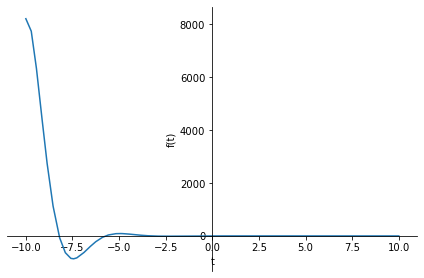

In [31]:
sp.plot(totalForceSolutions.rhs.subs(numericalSubstitutions), (time, -10, 10))

In [32]:
r_0 = totalForceSolutions.rhs.as_two_terms()[0].as_two_terms()[1].args[0]

In [33]:
sp.lambdify([time], totalForceSolutions.rhs.subs(numericalSubstitutions))(-10)

(8214.045293219046+0j)

In [34]:
negatedR0 = totalForceSolutions.rhs.subs({r_0 : -r_0})

In [35]:
negatedR0

(-c/(2*sqrt(c**2 - 4*k*m)) + 1/2)*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)) + (c/(2*sqrt(c**2 - 4*k*m)) + 1/2)*exp(-t*(-c + sqrt(c**2 - 4*k*m))/(2*m))

In [36]:
negatedR0.subs(numericalSubstitutions)

(1/2 + 304*sqrt(718027)*I/718027)*exp(-t*(2432 + 4*sqrt(718027)*I)/2684) + (1/2 - 304*sqrt(718027)*I/718027)*exp(-t*(-2432 + 4*sqrt(718027)*I)/2684)

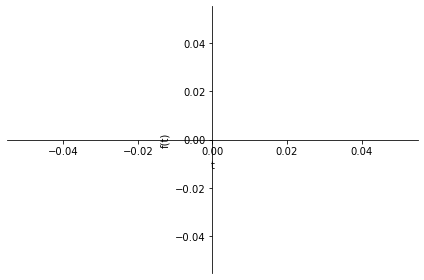

In [37]:
sp.plot(negatedR0.subs(numericalSubstitutions), (time, -10, 10))

In [38]:
sp.lambdify([time], negatedR0.subs(numericalSubstitutions))(-10)

(4107.022707126686+3351.2052923488973j)

In [39]:
omega = sp.sqrt((springConstant / mass) - ((dampiningConstant / (2 * mass)) ** 2))

In [40]:
omega

sqrt(-c**2/(4*m**2) + k/m)

In [41]:
givenSolution = sp.exp(-time * dampiningConstant / (2 * mass)) * sp.cos(omega * time)

In [42]:
givenSolution

exp(-c*t/(2*m))*cos(t*sqrt(-c**2/(4*m**2) + k/m))

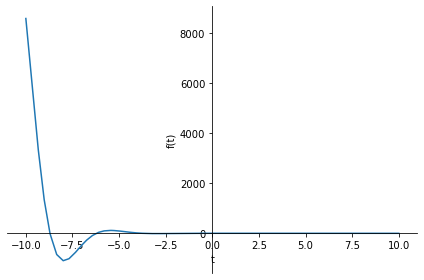

In [43]:
sp.plot(givenSolution.subs(numericalSubstitutions), (time, -10, 10))

In [44]:
givenSolution.subs(numericalSubstitutions)

exp(-608*t/671)*cos(sqrt(718027)*t/671)

In [45]:
sp.Eq(givenSolution, totalForceSolutions.rhs).refine()

Eq(exp(-c*t/(2*m))*cos(t*sqrt(-c**2/(4*m**2) + k/m)), (-c/(2*sqrt(c**2 - 4*k*m)) + 1/2)*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)) + (c/(2*sqrt(c**2 - 4*k*m)) + 1/2)*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

In [46]:
sp.lambdify([time], givenSolution.subs(numericalSubstitutions))(-10)

8597.086181043735